In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import seaborn as sns

In [4]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


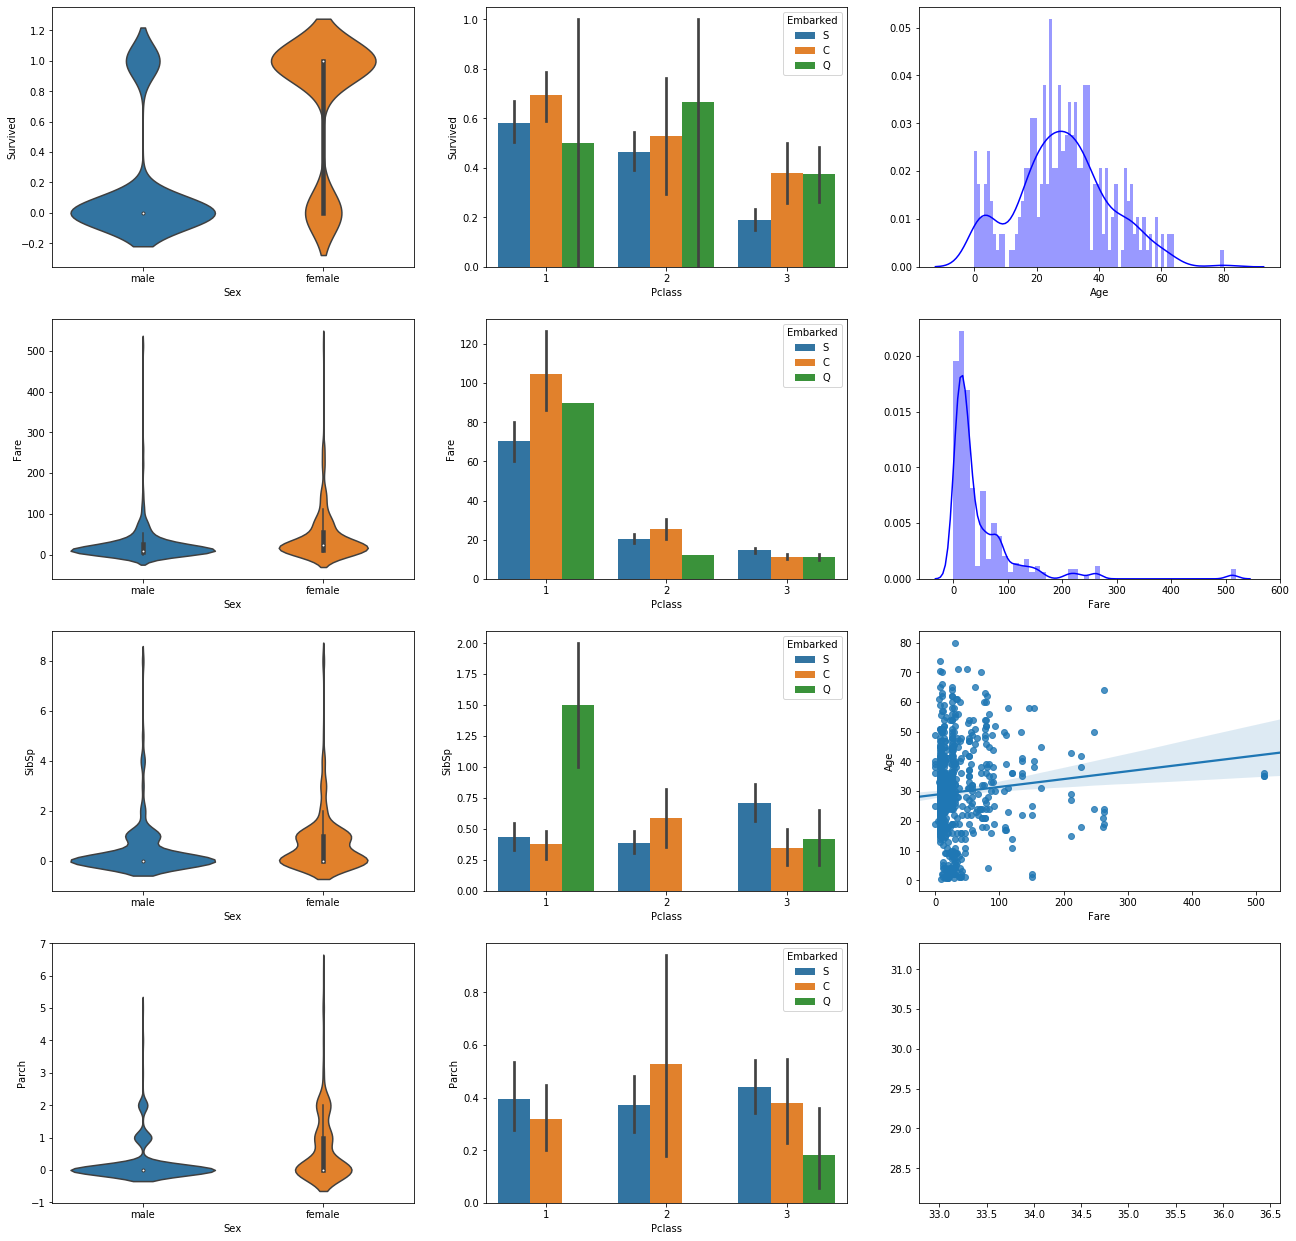

In [24]:
f, ax = plt.subplots(4, 3,figsize=[22,22])
sns.violinplot(x = 'Sex', y = 'Survived', data = train_data,ax = ax[0,0])

sns.barplot(x = 'Pclass',y ='Survived',data = train_data,hue = 'Embarked',ax = ax[0,1])

sns.distplot(train_data[train_data['Survived']==1]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',
            ax = ax[0,2])

sns.violinplot(x = 'Sex', y = 'Fare', data = train_data,ax = ax[1,0])
sns.barplot(x ='Pclass', y = 'Fare',data = train_data , hue = 'Embarked', ax = ax[1,1])
sns.distplot(train_data[train_data['Survived']==1]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'blue',
            ax = ax[1,2])

sns.violinplot(x = 'Sex', y ='SibSp',data = train_data,ax = ax[2,0])

sns.barplot(x= 'Pclass', y = 'SibSp', data = train_data, hue = 'Embarked', ax = ax[2,1])

sns.regplot(x = 'Fare', y = 'Age', data = train_data, ax = ax[2,2])

sns.violinplot(x = 'Sex', y = 'Parch', data = train_data, ax = ax[3,0])

sns.barplot(x = 'Pclass', y = 'Parch', data = train_data, hue = 'Embarked', ax = ax[3,1])

In [27]:
train_data['Age'] = train_data['Age'].interpolate()
train_data['Embarked'] = train_data['Embarked'].fillna('C')
train_data['Cabin']    = train_data['Cabin'].fillna('Z')
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [33]:
X = train_data.drop(['Name','Survived','Cabin','Ticket',
                  'Age','Fare',],axis = 1)
y = train_data['Survived']
X.shape , y.shape

((891, 6), (891,))

In [35]:
X.columns


Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [38]:
npX = np.array(X).copy()
npy = np.array(y).copy()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

clf_rf = RandomForestClassifier()
clf_et = ExtraTreesClassifier()
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_lr = LogisticRegression()
clf_svm = SVC()

Classifiers = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree','LogisticRegression','SVM']
scores = []
models = [clf_rf, clf_et, clf_bc, clf_ada, clf_dt, clf_lr, clf_svm]
for model in models:
    score = cross_val_score(model, npX, npy, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)


ValueError: could not convert string to float: 'female'